In [ ]:
!pip install geopandas
!pip install geoplot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import os

# Crane 2020

In [38]:
df_crane = pd.read_csv('Common Crane 2020.csv')

In [18]:
len(set([ts.split()[0] for ts in df_crane['timestamp']]))

1319

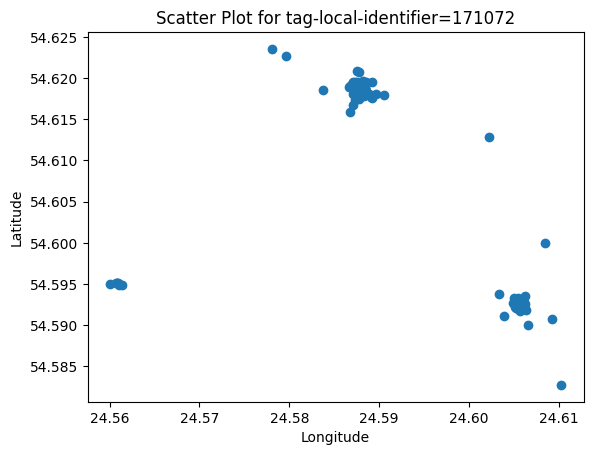

In [5]:
# Filter the DataFrame based on the condition
filtered_df = df_crane[df_crane['tag-local-identifier'] == 171072]

# Plot the scatter plot
plt.scatter(filtered_df['location-long'], filtered_df['location-lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot for tag-local-identifier=171072')
plt.show()

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\2519514429.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


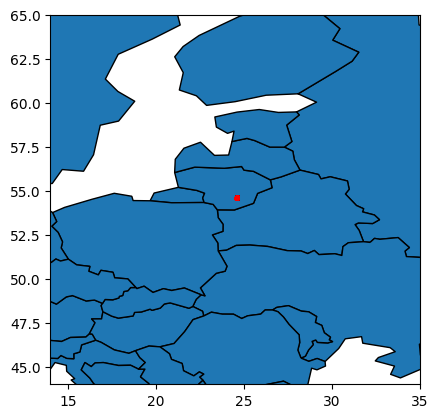

In [14]:
# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df['location-long'], filtered_df['location-lat']))
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Plot the world map
base = world.plot(edgecolor='black')
# Plot the scatter plot on the world map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(14, 35)
plt.ylim(44, 65)

plt.show()

In [41]:
df_crane = df_crane[df_crane['tag-local-identifier'] == 181906]

df_crane['timestamp'] = df_crane['timestamp'].str.split().str[0]

# Drop unnecessary columns
df_crane_r = df_crane[['timestamp', 'location-long', 'location-lat']]

# Group by timestamp and calculate the average of long and lat values
df_crane_r = df_crane_r.groupby('timestamp').mean().reset_index()

In [46]:
df_crane_r.shape

(118672, 30)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\3969986764.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


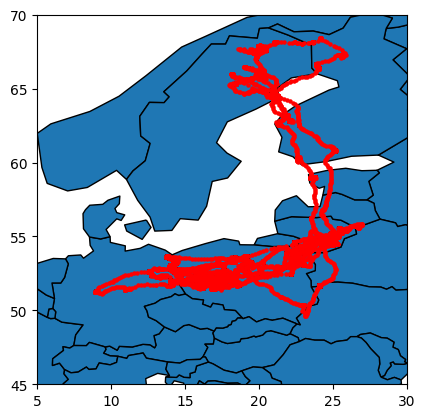

In [40]:
# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(df_crane, geometry=gpd.points_from_xy(df_crane['location-long'], df_crane['location-lat']))
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Plot the world map
base = world.plot(edgecolor='black')
# Plot the scatter plot on the world map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(5, 30)
plt.ylim(45, 70)

plt.show()

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\113411895.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


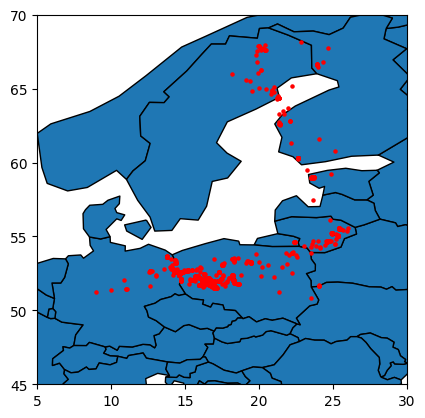

In [67]:
gdf = gpd.GeoDataFrame(df_crane_r, geometry=gpd.points_from_xy(df_crane_r['location-long'], df_crane_r['location-lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(5, 30)
plt.ylim(45, 70)

plt.show()

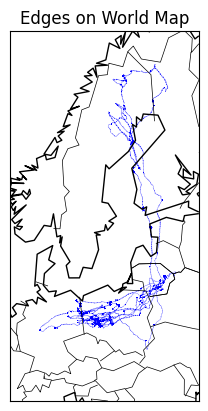

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Create a Basemap instance with the desired map projection
m = Basemap(projection='merc', llcrnrlat=45, urcrnrlat=70, llcrnrlon=5, urcrnrlon=30)

# Draw coastlines, countries, and states
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Convert longitude and latitude to map coordinates
x, y = m(df_crane['location-long'].values, df_crane['location-lat'].values)

# Plotting directed edges
m.quiver(x[:-1], y[:-1], x[1:] - x[:-1], y[1:] - y[:-1], scale_units='xy', angles='xy', scale=1, color='blue')

plt.title('Edges on World Map')
plt.show()

In [48]:
import os

# Create the "filtered" folder if it doesn't exist
folder_path = "filtered"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Define the file path
file_path = os.path.join(folder_path, "Common-Crane-2020.csv")

df_crane = df_crane[['timestamp', 'location-long', 'location-lat']]
# Save the DataFrame as a CSV file
df_crane.to_csv(file_path, index=False)

# Common Crane Lit

In [61]:
df_cranelit = pd.read_csv('Common Crane Lithuania GPS, 2015-2016.csv')
df_cranelit = df_cranelit[df_cranelit['tag-local-identifier'] == 15015]
df_cranelit = df_cranelit[['timestamp', 'location-long', 'location-lat']]
df_cranelit.shape

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\1722962545.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cranelit = pd.read_csv('Common Crane Lithuania GPS, 2015-2016.csv')


(74339, 3)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\2993000041.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


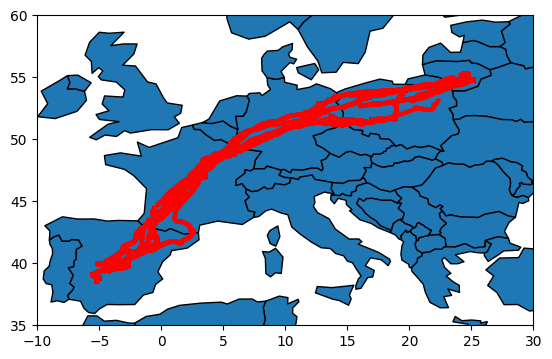

In [62]:
# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(df_cranelit, geometry=gpd.points_from_xy(df_cranelit['location-long'], df_cranelit['location-lat']))
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Plot the world map
base = world.plot(edgecolor='black')
# Plot the scatter plot on the world map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(-10, 30)
plt.ylim(35, 60)
plt.show()

(1033, 3)


C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_23712\1615020982.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


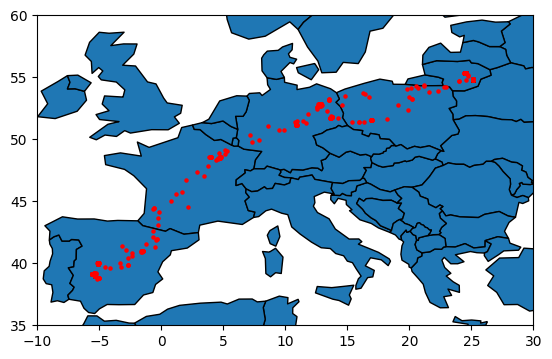

In [65]:
df_cranelit['timestamp'] = df_cranelit['timestamp'].str.split().str[0]
df_cranelit_r = df_cranelit.groupby('timestamp').mean().reset_index()
print(df_cranelit_r.shape)

gdf = gpd.GeoDataFrame(df_cranelit_r, geometry=gpd.points_from_xy(df_cranelit_r['location-long'], df_cranelit_r['location-lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(-10, 30)
plt.ylim(35, 60)
plt.show()

In [66]:
# Define the file path
file_path = os.path.join(folder_path, "Common-Crane-lit.csv")
# Save the DataFrame as a CSV file
df_cranelit.to_csv(file_path, index=False)

# Common Crane 2016


In [3]:
df_crane16 = pd.read_csv('Common Crane Lithuania GPS, 2016.csv')
df_crane16 = df_crane16[['timestamp', 'location-long', 'location-lat']]
df_crane16.shape

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\1172241461.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_crane16 = pd.read_csv('Common Crane Lithuania GPS, 2016.csv')


(429306, 3)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\3928878536.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


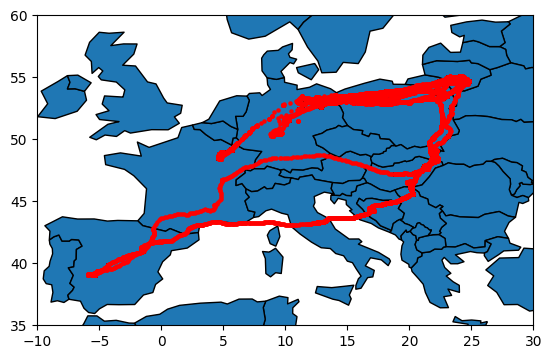

In [4]:
# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(df_crane16, geometry=gpd.points_from_xy(df_crane16['location-long'], df_crane16['location-lat']))
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Plot the world map
base = world.plot(edgecolor='black')
# Plot the scatter plot on the world map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(-10, 30)
plt.ylim(35, 60)
plt.show()

(2067, 3)


C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\84294768.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


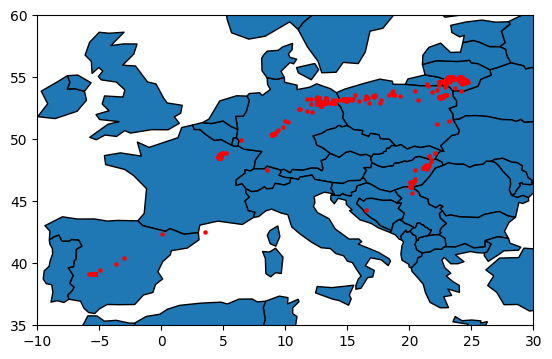

In [5]:
df_crane16['timestamp'] = df_crane16['timestamp'].str.split().str[0]
df_crane16_r = df_crane16.groupby('timestamp').mean().reset_index()
print(df_crane16_r.shape)

gdf = gpd.GeoDataFrame(df_crane16_r, geometry=gpd.points_from_xy(df_crane16_r['location-long'], df_crane16_r['location-lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(-10, 30)
plt.ylim(35, 60)
plt.show()

In [8]:
# Define the file path
file_path = os.path.join(folder_path, "Common-Crane-2016.csv")
# Save the DataFrame as a CSV file
df_crane16.to_csv(file_path, index=False)

# Siberian Crane

In [9]:
df_sibcrane = pd.read_csv('Siberian crane Grus Mongolia.csv')
df_sibcrane = df_sibcrane[['timestamp', 'location-long', 'location-lat']]
df_sibcrane.shape

(1728, 3)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\521031860.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


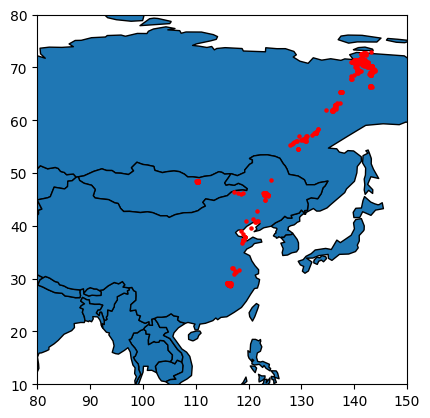

In [10]:
# Create a GeoDataFrame from the filtered DataFrame
gdf = gpd.GeoDataFrame(df_sibcrane, geometry=gpd.points_from_xy(df_sibcrane['location-long'], df_sibcrane['location-lat']))
# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Plot the world map
base = world.plot(edgecolor='black')
# Plot the scatter plot on the world map
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(80, 150)
plt.ylim(10, 80)
plt.show()

(311, 3)


C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\214715065.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


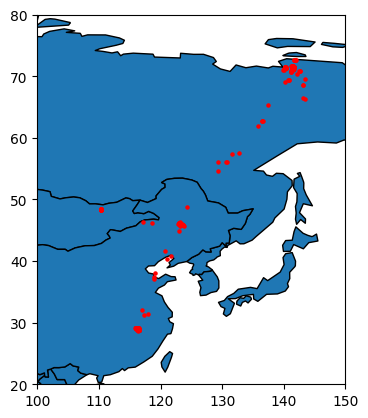

In [11]:
df_sibcrane['timestamp'] = df_sibcrane['timestamp'].str.split().str[0]
df_sibcrane_r = df_sibcrane.groupby('timestamp').mean().reset_index()
print(df_sibcrane_r.shape)

gdf = gpd.GeoDataFrame(df_sibcrane_r, geometry=gpd.points_from_xy(df_sibcrane_r['location-long'], df_sibcrane_r['location-lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(100, 150)
plt.ylim(20, 80)
plt.show()

In [22]:
file_path = os.path.join(folder_path, "Siberian-Crane.csv")
df_sibcrane.to_csv(file_path, index=False)

# Arctic Shoebird

In [25]:
df_shoebird = pd.read_csv('Arctic shorebird migration tracking study - Semipalmated Sandpiper.csv')
df_shoebird = df_shoebird[['timestamp', 'location-long', 'location-lat']]
df_shoebird.shape

(92, 3)

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\3601004767.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


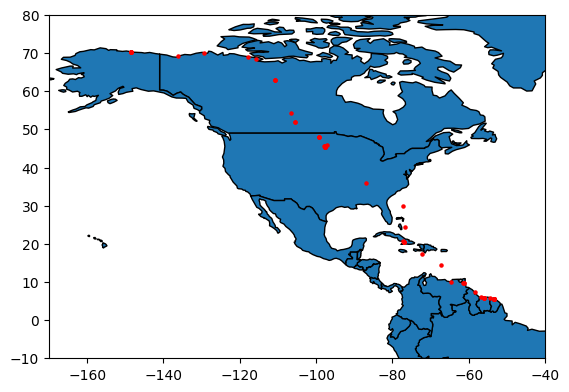

In [20]:
gdf = gpd.GeoDataFrame(df_shoebird, geometry=gpd.points_from_xy(df_shoebird['location-long'], df_shoebird['location-lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(-170, -40)
plt.ylim(-10, 80)
plt.show()

In [23]:
df_shoebird['timestamp'] = df_shoebird['timestamp'].str.split().str[0]
file_path = os.path.join(folder_path, "Arctic-Shoebird.csv")
df_shoebird.to_csv(file_path, index=False)

# Birds of Prey (Honey Buzzard and Spotted Eagle)

In [73]:
df_bop = pd.read_csv('Birds of prey Lithuania GPS 2014.csv')
print(df_bop['tag-local-identifier'].unique())
df_bop.shape

['DHIG05' 'DHIG18']


(2597, 14)

In [37]:
df_buz = df_bop[df_bop['tag-local-identifier'] == "DHIG05"]
df_eag = df_bop[df_bop['tag-local-identifier'] == "DHIG18"]
df_buz = df_buz[['timestamp', 'location-long', 'location-lat']]
df_eag = df_eag[['timestamp', 'location-long', 'location-lat']]

print( df_buz.shape , df_eag.shape )

(1725, 3) (872, 3)


C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\1680388975.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


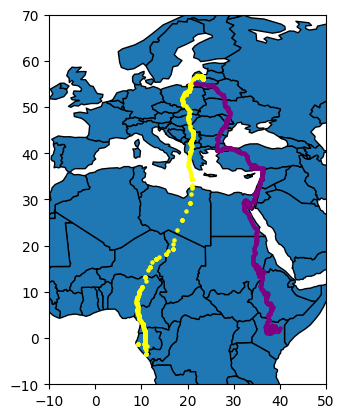

In [55]:
# Create a color map for 'tag-local-identifier'
color_map = {'DHIG05': 'yellow', 'DHIG18': 'purple'}

# Create a new column 'color' that maps 'tag-local-identifier' to colors
df_bop['color'] = df_bop['tag-local-identifier'].map(color_map)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_bop, geometry=gpd.points_from_xy(df_bop['location-long'], df_bop['location-lat']))

# Read the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map
base = world.plot(edgecolor='black')

# Plot the points
for color in df_bop['color'].unique():
    gdf[gdf['color'] == color].plot(ax=base, marker='o', color=color, markersize=5)

plt.xlim(-10, 50)
plt.ylim(-10, 70)
plt.show()

In [74]:
identifier_map = {'DHIG05': 1, 'DHIG18': 2}
df_bop['tag-local-identifier'] = df_bop['tag-local-identifier'].map(identifier_map)

df_bop['timestamp'] = df_bop['timestamp'].str.split().str[0]

In [43]:
df_buz['timestamp'] = df_buz['timestamp'].str.split().str[0]
df_eag['timestamp'] = df_eag['timestamp'].str.split().str[0]

In [75]:
df_bop_r = df_bop.groupby('timestamp').mean().reset_index()

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\2199262412.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bop_r = df_bop.groupby('timestamp').mean().reset_index()


In [76]:
df_bop_r.columns

Index(['timestamp', 'event-id', 'visible', 'location-long', 'location-lat',
       'eobs:battery-voltage', 'external-temperature',
       'gsm:gsm-signal-strength', 'mw:activity-count', 'tag-local-identifier'],
      dtype='object')

In [44]:
df_buz_r = df_buz.groupby('timestamp').mean().reset_index()
df_eag_r = df_eag.groupby('timestamp').mean().reset_index()

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\2554095337.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


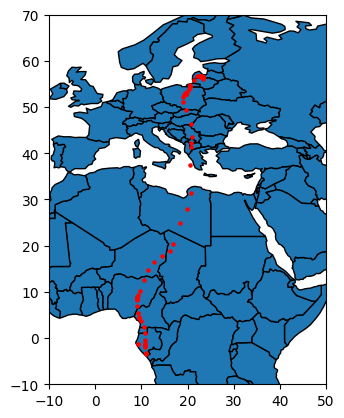

In [79]:
gdf = gpd.GeoDataFrame(df_buz_r, geometry=gpd.points_from_xy(df_buz_r['location-long'], df_buz_r['location-lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(-10, 50)
plt.ylim(-10, 70)
plt.show()

C:\Users\Yashraj Deshmukh\AppData\Local\Temp\ipykernel_9700\1818059285.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


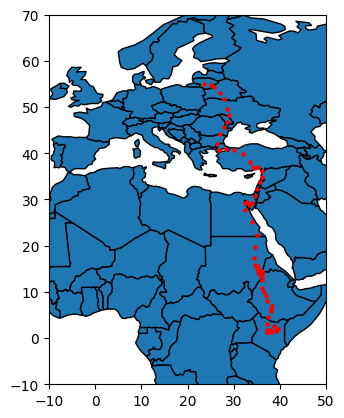

In [80]:
gdf = gpd.GeoDataFrame(df_eag_r, geometry=gpd.points_from_xy(df_eag_r['location-long'], df_eag_r['location-lat']))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

plt.xlim(-10, 50)
plt.ylim(-10, 70)
plt.show()

In [82]:
file_path = os.path.join(folder_path, "Honey-Buzzard.csv")
df_buz.to_csv(file_path, index=False)
file_path = os.path.join(folder_path, "Spotted-Eagle.csv")
df_eag.to_csv(file_path, index=False)